In [1]:
#Import libraries
import numpy as np
import sklearn.datasets as dataset
import matplotlib.pyplot as plt

In [19]:
#create dataset
# sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)[source]¶
#X,y = dataset.make_moons(n_samples = 400,noise = 0.6)
X,y =dataset.make_circles(n_samples=1000)

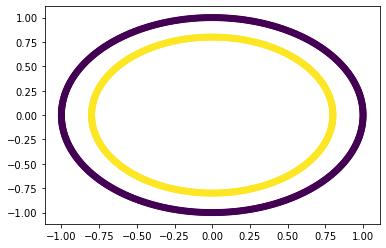

In [20]:
plt.scatter(X[:,0],X[:,1],c=y.T)

In [4]:
#initialize parameters (W,b)
# layer_dims = [n_x,n_h1,n_h2...,n_y] where n_x : input features, n_h : hidden layer size, n_y : o/p size
def initialize_parameters(layer_dims):
    parameters = {}
    for i in range(len(layer_dims)-1):
        parameters['W'+str(i+1)] = np.random.randn(layer_dims[i+1],layer_dims[i])*0.01
        parameters['b'+str(i+1)] = np.zeros((layer_dims[i+1],1))
    return parameters

In [5]:
#activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

In [42]:
#forward propagation
def forward(X,parameters,layer_dims):
    cache = {}
    cache['A0'] = X.T
    for i in range(len(layer_dims)-1):
        
        cache['Z'+str(i+1)] = np.dot(parameters['W'+str(i+1)],cache['A'+str(i)])+parameters['b'+str(i+1)]
        if i == len(layer_dims)-2:
            cache['A'+str(i+1)] = sigmoid(cache['Z'+str(i+1)])
            print('Apply sigmoid')
        else:
            cache['A'+str(i+1)] = np.tanh(cache['Z'+str(i+1)])
            print('Apply tanh')
    
    return cache

In [89]:
layer_dims = [2,4,4,4,4,4,4,4,1]
parameters = initialize_parameters(layer_dims)
cache = forward(X,parameters,layer_dims)

In [40]:
parameters.keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])

In [7]:
#As the sigmoid activation function is used we need to use 
#BCE loss function else the cost function will not be convergent and have multiple
#local minimas
def calc_loss(y_hat,y):
    m = y_hat.shape[1]
    #print(m)
    BCE_loss = -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    return BCE_loss/m

In [8]:
# Equations for this architecture would be 
# dZ = A - Y
# dW = (1/m)*dZ.X.T
#db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
def backprop(cache,y,layer_dims,parameters):
    m = y.shape[1]
    #print(y.shape)
    grads = {}
    for i in reversed(range(len(layer_dims)-1)):
        if i == len(layer_dims) -2:
            grads['dZ'+str(i+1)] = cache['A'+str(i+1)] - y
            
        else:
            
            grads['dZ'+str(i+1)] = np.dot(parameters['W'+str(i+2)].T,grads['dZ'+str(i+2)])*(1 - np.power(np.tanh(cache['Z'+str(i+1)]), 2))
        grads['dW'+str(i+1)]= np.dot(grads['dZ'+str(i+1)],cache['A'+str(i)].T)
        grads['db'+str(i+1)] = (1/m)*np.sum(grads['dZ'+str(i+1)],axis = 1, keepdims = True)
    return grads  
    

In [9]:
# test forward and backward pass
layer_dims = [2,4,4,4,4,4,4,4,4,4,1]
parameters = initialize_parameters(layer_dims)
cache = forward(X,parameters,layer_dims)
#y = y.reshape(1,len(y))
#grads = backprop(cache,y,layer_dims,parameters)

IndexError: tuple index out of range

In [10]:
parameters

{'W1': array([[ 0.01086513,  0.01342421],
        [-0.00757582,  0.01110561],
        [-0.00422224,  0.00242526],
        [ 0.00822855, -0.00999753]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.00072221, -0.00973128,  0.0097327 ,  0.00763705],
        [-0.00295997, -0.01303573, -0.01409281, -0.00528929],
        [-0.00917706,  0.00933567, -0.00942288, -0.00190213],
        [-0.00041539,  0.01333493,  0.0048286 , -0.00376266]]),
 'b2': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W3': array([[-0.00340323, -0.01379155, -0.00512928, -0.00840262],
        [-0.01367144,  0.00635015, -0.0075017 ,  0.00559497],
        [ 0.01651141, -0.00474021, -0.01833879, -0.0064653 ],
        [ 0.00415187, -0.00898896,  0.00030699, -0.02042035]]),
 'b3': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W4': array([[ 0.0101838 ,  0.0024111 ,  0.00215184,  0.015495  ],
        [ 0.00922203, -0.00684159,  0.00405629,  0.02252889],
        [-0.00

In [11]:
def update_parameters(parameters,grads,layer_dims,learning_rate=0.5):
    for i in range(len(layer_dims)-1):
        parameters['W'+str(i+1)] -= learning_rate*grads['dW'+str(i+1)]
        parameters['b'+str(i+1)] -= learning_rate*grads['db'+str(i+1)]
    return parameters

In [108]:
parameters = update_parameters(parameters,grads,layer_dims,learning_rate=0.5)

In [25]:
parameters

{'W1': array([[-0.00862273, -0.00591256],
        [ 0.00646659, -0.00449727],
        [ 0.00297755,  0.00475164],
        [ 0.01727915, -0.00251637],
        [-0.02642499, -0.0104935 ],
        [-0.01944129, -0.00741918],
        [ 0.00101455, -0.00422844],
        [-0.01234277,  0.01353027],
        [-0.00572897,  0.00643009],
        [-0.00738973,  0.00325356]]),
 'b1': array([[ 1.78000576e-10],
        [-4.19127940e-11],
        [ 4.82502685e-12],
        [ 2.68302927e-10],
        [-6.35635604e-10],
        [ 1.09378565e-12],
        [ 3.40458855e-12],
        [ 1.88019620e-10],
        [ 5.60852714e-11],
        [-4.45555472e-11]]),
 'W2': array([[-0.00284437,  0.00080917, -0.00061718, -0.02295252,  0.00188324,
          0.02500144,  0.02309101,  0.00079595, -0.01299291,  0.0022305 ],
        [-0.02132553, -0.00782807, -0.00449347, -0.02238033,  0.00901867,
         -0.01816301, -0.00787984, -0.00629378,  0.00447099,  0.00295166],
        [ 0.00834721, -0.01324128,  0.00951653,  0

In [110]:
cache.keys()

dict_keys(['A0', 'Z1', 'A1', 'Z2', 'A2', 'Z3', 'A3'])

In [27]:
def NN_model(X,y,epochs,layer_dims,learning_rate):
    y = y.reshape(1,len(y))
    parameters = initialize_parameters(layer_dims) # genarally we need to pass the layer dims in this
    for i in range(epochs):
        cache = forward(X,parameters,layer_dims)
        loss = calc_loss(cache['A'+str(len(layer_dims)-1)],y)
        if i%50==0:
            print('loss in epoch {} : {}'.format(i,loss))
        grads = backprop(cache,y,layer_dims,parameters)
        parameters = update_parameters(parameters,grads,layer_dims,learning_rate)
    return parameters,grads

In [13]:
def predict(X,parameters):
    cache = forward(X,parameters,layer_dims)
    predicted = cache['A'+str(len(layer_dims)-1)]
    predicted[predicted<0.5] = 0
    predicted[predicted>0.5] = 1
    return predicted

In [43]:
layer_dims = [2,10,10,1]
parameters,grads = NN_model(X,y,100,layer_dims,learning_rate=0.1) 

Apply tanh
Apply tanh
Apply sigmoid
loss in epoch 0 : 0.693147180570951
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply sigmoid
Apply tanh
Apply tanh
Apply 

In [41]:
grads

{'dZ3': array([[ 0.49999833, -0.50000054, -0.49999922, -0.49999937,  0.49999809,
          0.50000179, -0.49999914,  0.50000155,  0.50000196, -0.50000113,
         -0.49999947,  0.50000027,  0.49999803,  0.50000194, -0.50000146,
         -0.49999901,  0.49999915, -0.49999943,  0.50000065, -0.49999866,
          0.49999816, -0.49999894, -0.50000124,  0.50000069,  0.50000019,
         -0.49999883,  0.50000135,  0.50000187, -0.50000044, -0.50000157,
         -0.50000064,  0.50000041, -0.49999851, -0.49999931, -0.5000015 ,
         -0.50000072,  0.49999848,  0.49999805,  0.5000017 , -0.49999915,
          0.50000181,  0.49999951,  0.49999803, -0.49999842, -0.49999849,
          0.50000142, -0.49999961, -0.49999935,  0.49999819,  0.49999806,
          0.50000051,  0.49999988,  0.50000167, -0.50000128, -0.50000134,
          0.49999826,  0.49999937, -0.50000066, -0.5000015 , -0.50000155,
         -0.49999844,  0.49999914,  0.50000057,  0.49999882,  0.49999894,
         -0.4999993 ,  0.499998

In [93]:
 predicted = predict(X,parameters)

In [94]:
def accuracy(predicted,y):
    y = y.reshape(1,len(y))
    return (1 - np.sum(abs(y - predicted))/y.shape[1])*100

In [95]:
acc = accuracy(predicted,y)
print('Accuracy of the model is {0:.02f}%'.format(acc))

Accuracy of the model is 50.00%


In [96]:
def plot_decision_boundary(parameters): 
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = predict(np.c_[xx.ravel(), yy.ravel()],parameters) 
  #  print(Z)
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z) 
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    

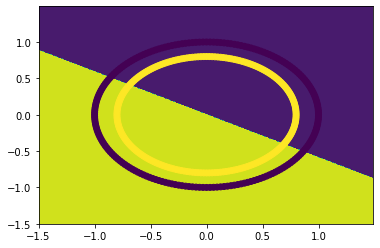

In [97]:
plot_decision_boundary(parameters)